In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA 
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [38]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') 
df_comp = df_comp.ffill()  

In [39]:
df_comp['market_value']=df_comp.ftse

In [40]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [41]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf  # Log-vraisemblance du premier modèle
    L2 = mod_2.llf  # Log-vraisemblance du deuxième modèle
    LR = 2 * (L2 - L1)  # Statistique de test
    p = chi2.sf(LR, DF).round(3)  # p-value
    return p


In [53]:
df.loc[:, 'returns'] = df['market_value'].pct_change(1) * 100


In [54]:
import statsmodels
print(statsmodels.__version__)


0.14.2


In [55]:
model_ar_1_1_ma_1 = ARIMA(df['market_value'], order=(1, 1, 1))
results_ar_1_1_ma_1 = model_ar_1_1_ma_1.fit()
results_ar_1_1_ma_1.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Thu, 12 Dec 2024   AIC                          55214.010
Time:                        19:25:36   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.652      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.923      0.000      -0.896      -0.688
sigma2      3498.8181     40.934     85.475      0.000    3418.589    3579.047
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.21
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

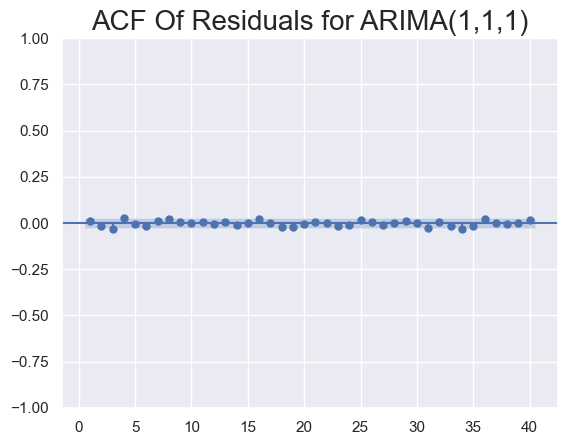

In [56]:
df['res_ar_1_1_1_ma_1'] = results_ar_1_1_ma_1.resid
sgt.plot_acf(df['res_ar_1_1_1_ma_1'], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()


In [60]:
model_ar_1_1_1 = ARIMA(df['market_value'], order=(1, 1, 1))
results_ar_1_1_1_ma_1 = model_ar_1_1_1.fit()
model_ar_1_1_2 = ARIMA(df['market_value'], order=(1, 1, 2))
results_ar_1_1_1_ma_2 = model_ar_1_1_2.fit()
model_ar_1_1_3 = ARIMA(df['market_value'], order=(1, 1, 3))
results_ar_1_1_1_ma_3 = model_ar_1_1_3.fit()
model_ar_2_1_1 = ARIMA(df['market_value'], order=(2, 1, 1))
results_ar_2_1_1_ma_1 = model_ar_2_1_1.fit()
model_ar_3_1_1 = ARIMA(df['market_value'], order=(3, 1, 1))
results_ar_3_1_1_ma_1 = model_ar_3_1_1.fit()
model_ar_3_1_2 = ARIMA(df['market_value'], order=(3, 1, 2))
results_ar_3_1_1_ma_2 = model_ar_3_1_2.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [61]:
print("ARIMA(1,1,1): \t LL =", results_ar_1_1_1_ma_1.llf, "\t AIC =", results_ar_1_1_1_ma_1.aic)
print("ARIMA(1,1,2): \t LL =", results_ar_1_1_1_ma_2.llf, "\t AIC =", results_ar_1_1_1_ma_2.aic)
print("ARIMA(1,1,3): \t LL =", results_ar_1_1_1_ma_3.llf, "\t AIC =", results_ar_1_1_1_ma_3.aic)
print("ARIMA(2,1,1): \t LL =", results_ar_2_1_1_ma_1.llf, "\t AIC =", results_ar_2_1_1_ma_1.aic)
print("ARIMA(3,1,1): \t LL =", results_ar_3_1_1_ma_1.llf, "\t AIC =", results_ar_3_1_1_ma_1.aic)
print("ARIMA(3,1,2): \t LL =", results_ar_3_1_1_ma_2.llf, "\t AIC =", results_ar_3_1_1_ma_2.aic)


ARIMA(1,1,1): 	 LL = -27604.005129402038 	 AIC = 55214.010258804075
ARIMA(1,1,2): 	 LL = -27600.407632541355 	 AIC = 55208.81526508271
ARIMA(1,1,3): 	 LL = -27590.723481945686 	 AIC = 55191.44696389137
ARIMA(2,1,1): 	 LL = -27600.130551053826 	 AIC = 55208.26110210765
ARIMA(3,1,1): 	 LL = -27592.336116472583 	 AIC = 55194.672232945166
ARIMA(3,1,2): 	 LL = -27590.92031804928 	 AIC = 55193.84063609856


In [67]:

import statsmodels.api as sm
import pandas as pd

results_ar_1_1_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 1)).fit()
results_ar_1_1_1_ma_2 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 2)).fit()
results_ar_1_1_1_ma_3 = sm.tsa.ARIMA(df['market_value'], order=(1, 1, 3)).fit()
results_ar_2_1_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(2, 1, 1)).fit()
results_ar_3_1_1_ma_1 = sm.tsa.ARIMA(df['market_value'], order=(3, 1, 1)).fit()
results_ar_3_1_1_ma_2 = sm.tsa.ARIMA(df['market_value'], order=(3, 1, 2)).fit()


print("ARIMA(1,1,1): \t LL =", results_ar_1_1_1_ma_1.llf, "\t AIC =", results_ar_1_1_1_ma_1.aic)
print("ARIMA(1,1,2): \t LL =", results_ar_1_1_1_ma_2.llf, "\t AIC =", results_ar_1_1_1_ma_2.aic)
print("ARIMA(1,1,3): \t LL =", results_ar_1_1_1_ma_3.llf, "\t AIC =", results_ar_1_1_1_ma_3.aic)
print("ARIMA(2,1,1): \t LL =", results_ar_2_1_1_ma_1.llf, "\t AIC =", results_ar_2_1_1_ma_1.aic)
print("ARIMA(3,1,1): \t LL =", results_ar_3_1_1_ma_1.llf, "\t AIC =", results_ar_3_1_1_ma_1.aic)
print("ARIMA(3,1,2): \t LL =", results_ar_3_1_1_ma_2.llf, "\t AIC =", results_ar_3_1_1_ma_2.aic)



C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1): 	 LL = -27604.005129402038 	 AIC = 55214.010258804075
ARIMA(1,1,2): 	 LL = -27600.407632541355 	 AIC = 55208.81526508271
ARIMA(1,1,3): 	 LL = -27590.723481945686 	 AIC = 55191.44696389137
ARIMA(2,1,1): 	 LL = -27600.130551053826 	 AIC = 55208.26110210765
ARIMA(3,1,1): 	 LL = -27592.336116472583 	 AIC = 55194.672232945166
ARIMA(3,1,2): 	 LL = -27590.92031804928 	 AIC = 55193.84063609856


In [69]:
print("LLR test p-value = " + str(LLR_test(results_ar_1_1_1_ma_2, results_ar_1_1_1_ma_3)))
print("LLR test p-value = " + str(LLR_test(results_ar_1_1_1_ma_1, results_ar_1_1_1_ma_3, DF=2)))


LLR test p-value = 0.0
LLR test p-value = 0.0


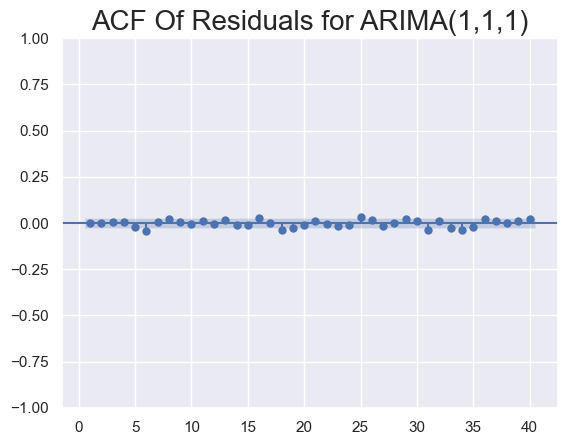

In [70]:
df['res_ar_1_1_1_ma_3'] = results_ar_1_1_1_ma_3.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_1_1_ma_3[1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()

In [72]:
model_ar_5_1_1_ma_1 = ARIMA(df['market_value'], order=(5,1,1))
results_ar_5_1_1_ma_1 = model_ar_5_1_1_ma_1.fit()
print(results_ar_5_1_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Thu, 12 Dec 2024   AIC                          55187.689
Time:                        20:02:34   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.0

In [74]:
model_ar_5_1_1_ma_1 = ARIMA(df['market_value'], order=(5,1,1))
results_ar_5_1_1_ma_1 = model_ar_5_1_1_ma_1.fit()
model_ar_6_1_1_ma_3 = ARIMA(df['market_value'], order=(6,1,3))
results_ar_6_1_1_ma_3 = model_ar_6_1_1_ma_3.fit()  
print("ARIMA(1,1,3): \t LL =", results_ar_1_1_1_ma_3.aic, "\t AIC =", results_ar_1_1_1_ma_3.aic)
print("ARIMA(5,1,1): \t LL =", results_ar_5_1_1_ma_1.aic, "\t AIC =", results_ar_5_1_1_ma_1.aic)
print("ARIMA(6,1,3): \t LL =", results_ar_6_1_1_ma_3.aic, "\t AIC =", results_ar_6_1_1_ma_3.aic)


ARIMA(1,1,3): 	 LL = 55191.44696389137 	 AIC = 55191.44696389137
ARIMA(5,1,1): 	 LL = 55187.689219167485 	 AIC = 55187.689219167485
ARIMA(6,1,3): 	 LL = 55187.71699959165 	 AIC = 55187.71699959165


In [76]:
model_ar_1_1_1_ma_3 = ARIMA(df['market_value'], order=(1, 1, 3))
results_ar_1_1_1_ma_3 = model_ar_1_1_1_ma_3.fit()
model_ar_6_1_1_ma_3 = ARIMA(df['market_value'], order=(6, 1, 3))
results_ar_6_1_1_ma_3 = model_ar_6_1_1_ma_3.fit()  
print("LLR test p-value = " + str(LLR_test(results_ar_1_1_1_ma_3, results_ar_6_1_1_ma_3, DF=5)))


LLR test p-value = 0.017


In [77]:
model_ar_5_1_1_ma_1 = ARIMA(df['market_value'], order=(5, 1, 1))
results_ar_5_1_1_ma_1 = model_ar_5_1_1_ma_1.fit() 
model_ar_6_1_1_ma_3 = ARIMA(df['market_value'], order=(6, 1, 3))
results_ar_6_1_1_ma_3 = model_ar_6_1_1_ma_3.fit() 
print("LLR test p-value = " + str(LLR_test(results_ar_5_1_1_ma_1, results_ar_6_1_1_ma_3, DF=5)))


LLR test p-value = 0.309


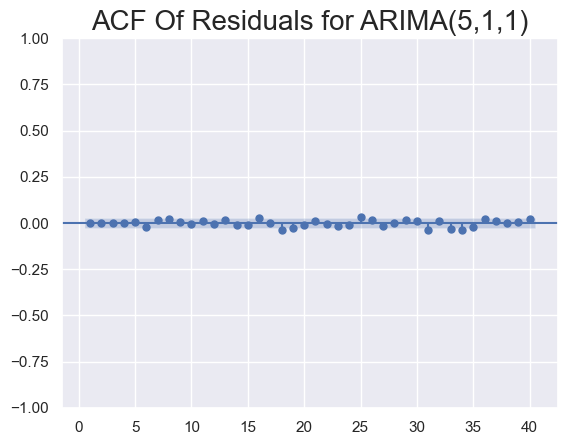

In [78]:
df['res_ar_5_1_1_ma_1'] = results_ar_5_1_1_ma_1.resid
sgt.plot_acf(df['res_ar_5_1_1_ma_1'][1:], zero=False, lags=40)  # Enlève le premier résidu avec [1:]
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

In [79]:
df['delta_prices'] = df['market_value'].diff(1)

In [80]:
model_ar_1_1_1_ma_1 = ARIMA(df['delta_prices'].dropna(), order=(1,0,1)) 
results_ar_1_1_1_ma_1 = model_ar_1_1_1_ma_1.fit()
results_ar_1_1_1_ma_1.summary()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Thu, 12 Dec 2024   AIC                          55215.333
Time:                        20:38:40   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707446,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.961042218914)

In [82]:
model_ar_1_1_2_ma_1 = ARIMA(df['market_value'], order=(1, 2, 1))
results_ar_1_1_2_ma_1 = model_ar_1_1_2_ma_1.fit()
results_ar_1_1_2_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.176
Date:                Thu, 12 Dec 2024   AIC                          55234.352
Time:                        20:40:56   BIC                          55253.915
Sample:                    01-07-1994   HQIC                         55241.207
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0175      0.010     -1.777      0.076      -0.037       0.002
ma.L1         -1.0000      0.026    -38.985      0.000      -1.050      -0.950
sigma2      3512.6580     96.774     36.298      0.000    3322.985    3702.331
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3335.44
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

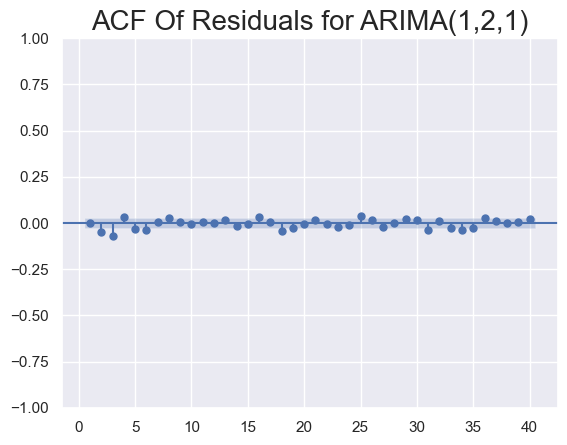

In [83]:
df['res_ar_1_1_2_ma_1'] = results_ar_1_1_2_ma_1.resid
sgt.plot_acf(df['res_ar_1_1_2_ma_1'][2:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)", size=20)
plt.show()


In [96]:
# Check for NaN values
print(df['returns'].isna().sum())

# Check for infinite values
print((df['returns'] == np.inf).sum())
print((df['returns'] == -np.inf).sum())


1
0
0


In [97]:
df_clean = df[~df['returns'].isna() & ~df['returns'].isin([np.inf, -np.inf])]


In [98]:
print(df_clean['returns'].isna().sum())  # Should print 0
print((df_clean['returns'] == np.inf).sum())  # Should print 0
print((df_clean['returns'] == -np.inf).sum())  # Should print 0



0
0
0


In [102]:
model_ar_1_1_1_ma_1_Xreturns = ARIMA(df_clean['market_value'], exog=df_clean['returns'], order=(1, 1, 1))
results_ar_1_1_1_ma_1_Xreturns = model_ar_1_1_1_ma_1_Xreturns.fit()
results_ar_1_1_1_ma_1_Xreturns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25014.368
Date:                Thu, 12 Dec 2024   AIC                          50036.736
Time:                        20:58:37   BIC                          50062.820
Sample:                    01-10-1994   HQIC                         50045.876
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns       24.4294      0.092    265.043      0.000      24.249      24.610
ar.L1          0.0021      0.014      0.148      0.882      -0.026       0.031
ma.L1          0.6559      0.011     57.550      0.000       0.634       0.678
sigma2      1248.6893     14.935     83.610      0.000    1219.418    1277.961
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3253.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
# Vérifier s'il y a des NaN ou des valeurs infinies dans 'returns'
print(df['returns'].isnull().sum())  # Compter les NaN
print((df['returns'] == float('inf')).sum())  # Compter les valeurs infinies
print((df['returns'] == float('-inf')).sum())  # Compter les valeurs infinies négatives








1
0
0


In [111]:
# Supprimer les lignes où 'returns' est NaN ou Inf
df_clean = df[~df['returns'].isin([float('inf'), float('-inf')])]
df_clean = df_clean.dropna(subset=['returns'])


In [113]:
model_sarimax = SARIMAX(df_clean['market_value'], exog=df_clean['returns'], order=(1, 0, 1), seasonal_order=(2, 0, 1, 5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5020
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26573.022
Date:                           Thu, 12 Dec 2024   AIC                          53160.045
Time:                                   21:04:17   BIC                          53205.693
Sample:                               01-10-1994   HQIC                         53176.041
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns       24.4346      0.052    466.469      0.000      24.332      24.537
ar.L1          0.9999      0.001    770.520      0.000       0.997       1.002
ma.L1          0.9962      0.001   1037.822      0.000       0.994       0.998
ar.S.L5        0.0077      0.001     11.538      0.000       0.006       0.009
ar.S.L10       0.9923      0.001   1466.140      0.000       0.991       0.994
ma.S.L5       -0.9997      0.006   -154.633      0.000      -1.012      -0.987
sigma2      2311.5684      6.573    351.666      0.000    2298.685    2324.452
===================================================================================
Ljung-Box (L1) (Q):                 324.15   Jarque-Bera (JB):              3163.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
df['sq_returns'] = df.returns.mul(df.returns)

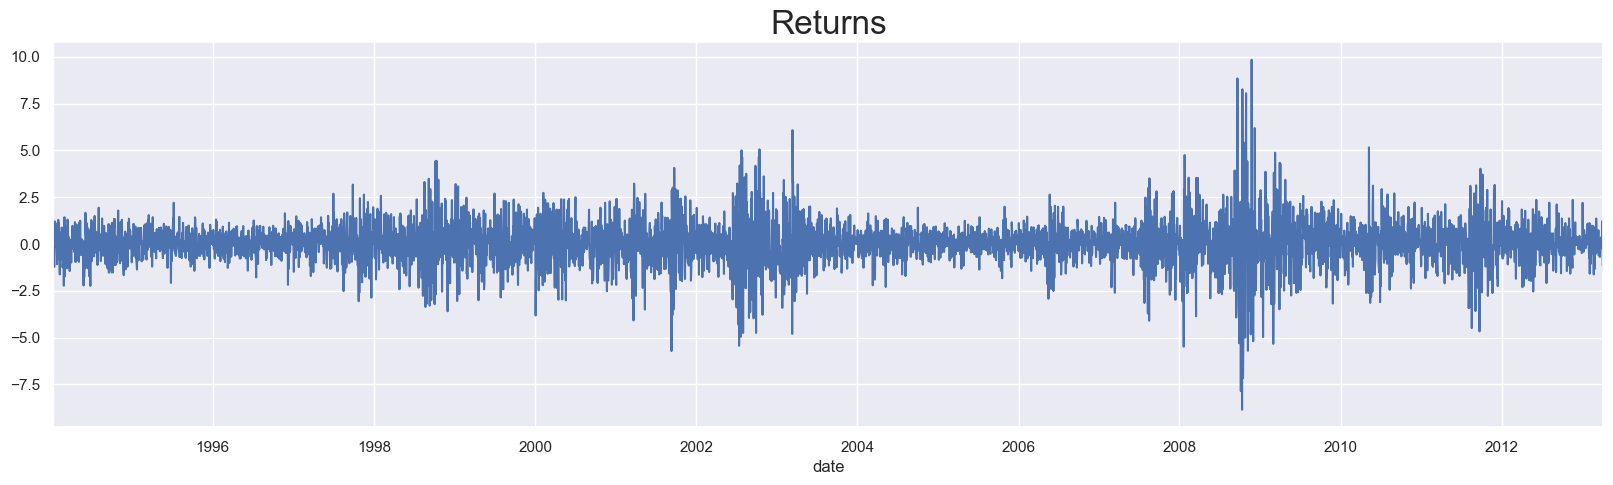

In [115]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size=24)
plt.show()

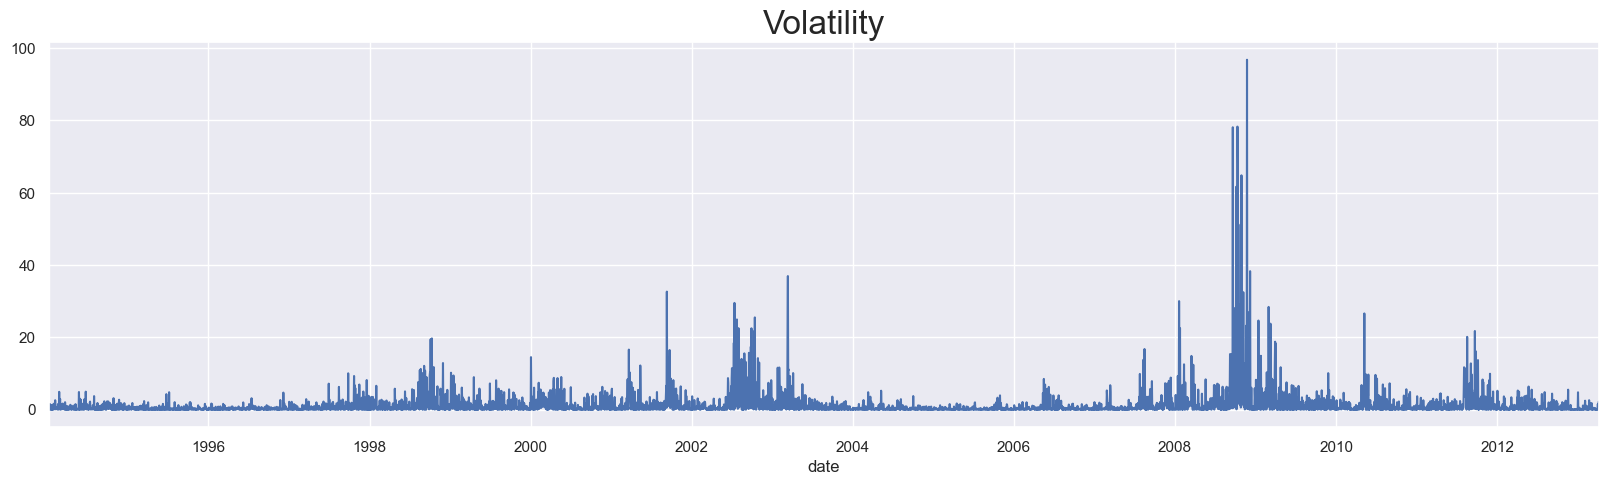

In [116]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size=24)
plt.show()

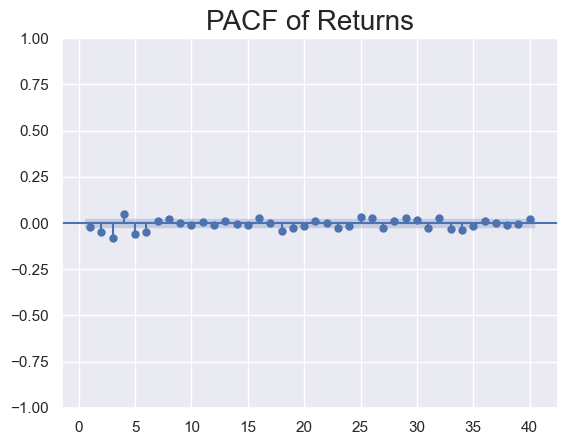

In [117]:
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Returns", size=20)
plt.show()

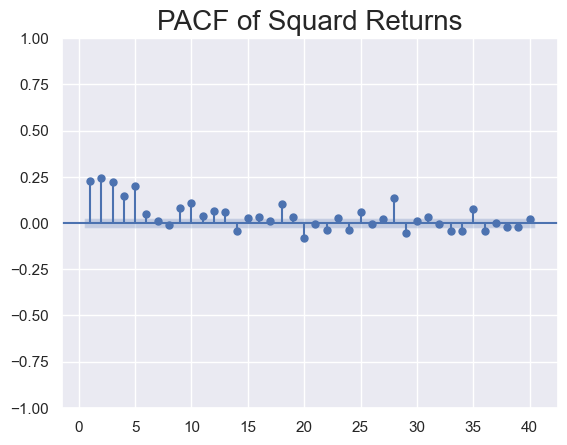

In [118]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Squard Returns", size=20)
plt.show()


In [122]:
from arch import arch_model


In [123]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035884053223
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712869697414
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.41810662336
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271036620865
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.879267693578
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088049128948
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478416067
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.058367475404
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189876
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189162
Optimization terminated successfully    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:12:26   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [126]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.08878204096
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.08878204096
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:15:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

In [128]:
model_arch_1 = arch_model(df.returns[1:], mean="AR", lags=[2, 3, 6], vol="ARCH", p=1, dist="ged")

results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: 17360276.97913753
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7326.620838216279
Iteration:     15,   Func. Count:    142,   Neg. LLF: 7317.121042006874
Iteration:     20,   Func. Count:    186,   Neg. LLF: 7317.118105570571
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7317.118092652076
            Iterations: 22
            Function evaluations: 206
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.008
Mean Model:                                    AR   Adj. R-squared:                  0.007
Vol Model:                                   ARCH   Log-Likelihood:               -7317.12
Distribution:      Generalized Error Distribution   AIC:                           14648.2
Method:                        Maximum Likelihood   BIC:                           14693.9
                                                    No. Observations:                 5014
Date:                            Thu, Dec 12 2024   Df Residuals:                     5010
Time:                                    21:19:34   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0474  6.105e-03      7.766  8.129e-15   [3.544e-02,5.937e-02]
returns[2]    -0.0396  2.805e-02     -1.411      0.158  [-9.454e-02,1.540e-02]
returns[3]    -0.0348  5.911e-03     -5.883  4.021e-09 [-4.636e-02,-2.319e-02]
returns[6]    -0.0283  1.723e-03    -16.440  9.899e-61 [-3.169e-02,-2.494e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9166  3.760e-02     24.378 2.914e-131 [  0.843,  0.990]
alpha[1]       0.3428  3.939e-02      8.703  3.224e-18 [  0.266,  0.420]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0675  3.250e-02     32.843 1.421e-236 [  1.004,  1.131]
========================================================================

Covariance estimator: robust
"""

In [130]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq=5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098214
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:20:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [131]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq=5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 7496.4079308108885
Iteration:     10,   Func. Count:     75,   Neg. LLF: 7277.050452148393
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:21:11   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.505e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""

In [132]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq=5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     89,   Neg. LLF: 10011.775468928608
Iteration:     10,   Func. Count:    179,   Neg. LLF: 7470.895326223472
Iteration:     15,   Func. Count:    269,   Neg. LLF: 7087.895295199729
Iteration:     20,   Func. Count:    359,   Neg. LLF: 7070.0344687053785
Iteration:     25,   Func. Count:    444,   Neg. LLF: 6984.175063672459
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6984.175062617
            Iterations: 27
            Function evaluations: 475
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6984.18
Distribution:                  Normal   AIC:                           13998.4
Method:            Maximum Likelihood   BIC:                           14096.2
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:22:24   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0492  1.206e-02      4.077  4.566e-05 [2.553e-02,7.281e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1871  2.210e-02      8.466  2.538e-17      [  0.144,  0.230]
alpha[1]       0.0568  1.729e-02      3.282  1.029e-03  [2.287e-02,9.065e-02]
alpha[2]       0.1156  2.017e-02      5.733  9.840e-09    [7.610e-02,  0.155]
alpha[3]       0.1265  2.625e-02      4.820  1.433e-06    [7.509e-02,  0.178]
alpha[4]       0.0884  2.159e-02      4.093  4.265e-05    [4.605e-02,  0.131]
alpha[5]       0.0695  1.750e-02      3.970  7.189e-05    [3.518e-02,  0.104]
alpha[6]       0.0865  1.926e-02      4.491  7.092e-06    [4.874e-02,  0.124]
alpha[7]       0.0404  1.846e-02      2.188  2.870e-02  [4.203e-03,7.658e-02]
alpha[8]       0.0654  1.833e-02      3.565  3.633e-04    [2.943e-02,  0.101]
alpha[9]       0.0292  1.603e-02      1.820  6.877e-02 [-2.244e-03,6.058e-02]
alpha[10]      0.0335  1.605e-02      2.089  3.670e-02  [2.072e-03,6.498e-02]
alpha[11]      0.0775  1.760e-02      4.403  1.067e-05    [4.300e-02,  0.112]
alpha[12]      0.0473  1.873e-02      2.526  1.153e-02  [1.060e-02,8.402e-02]
alpha[13]      0.0372  1.431e-02      2.600  9.317e-03  [9.162e-03,6.526e-02]
=============================================================================

Covariance estimator: robust
"""

In [133]:
model_garch_1_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712869697414
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478416067
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366189876
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:24:03   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [134]:
model_garch_1_2 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=2)
results_garch_1_2 = model_garch_1_2.fit(update_freq=5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 6974.174338061595
Iteration:     10,   Func. Count:     71,   Neg. LLF: 6970.058392236019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366267055
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13950.1
Method:            Maximum Likelihood   BIC:                           13982.7
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:26:00   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.184e-02      3.938  8.219e-05 [2.341e-02,6.982e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.908e-03      3.760  1.696e-04 [5.236e-03,1.663e-02]
alpha[1]       0.0835  1.189e-02      7.019  2.233e-12   [6.017e-02,  0.107]
beta[1]        0.9089      0.188      4.845  1.269e-06     [  0.541,  1.277]
beta[2]    3.7130e-09      0.180  2.065e-08      1.000     [ -0.352,  0.352]
============================================================================

Covariance estimator: robust
"""

In [135]:
model_garch_1_3 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=3)
results_garch_1_3 = model_garch_1_3.fit(update_freq=5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 7044.915118311412
Iteration:     10,   Func. Count:     88,   Neg. LLF: 6973.180837188822
Iteration:     15,   Func. Count:    124,   Neg. LLF: 6970.05836738501
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6970.058366229505
            Iterations: 17
            Function evaluations: 137
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13952.1
Method:            Maximum Likelihood   BIC:                           13991.2
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:26:47   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.179e-02      3.954  7.683e-05 [2.351e-02,6.972e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0109  8.168e-03      1.339      0.181 [-5.074e-03,2.694e-02]
alpha[1]       0.0835  6.069e-02      1.376      0.169   [-3.546e-02,  0.202]
beta[1]        0.9089      2.151      0.422      0.673      [ -3.308,  5.125]
beta[2]        0.0000      3.380      0.000      1.000      [ -6.625,  6.625]
beta[3]    7.3918e-13      1.296  5.704e-13      1.000      [ -2.540,  2.540]
=============================================================================

Covariance estimator: robust
"""

In [136]:
model_garch_2_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=2, q=1)
results_garch_2_1 = model_garch_2_1.fit(update_freq=5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8793.711867692436
Iteration:     10,   Func. Count:     76,   Neg. LLF: 6967.731247505904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.731020076308
            Iterations: 12
            Function evaluations: 87
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.73
Distribution:                  Normal   AIC:                           13945.5
Method:            Maximum Likelihood   BIC:                           13978.1
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:27:46   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.187e-02      3.922  8.780e-05 [2.329e-02,6.982e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0129  4.097e-03      3.158  1.589e-03  [4.908e-03,2.097e-02]
alpha[1]       0.0547  1.665e-02      3.286  1.017e-03  [2.208e-02,8.735e-02]
alpha[2]       0.0389  2.345e-02      1.659  9.709e-02 [-7.056e-03,8.488e-02]
beta[1]        0.8974  1.712e-02     52.415      0.000      [  0.864,  0.931]
=============================================================================

Covariance estimator: robust
"""

In [137]:
model_garch_3_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=3, q=1)
results_garch_3_1 = model_garch_3_1.fit(update_freq=5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 6998.998850883414
Iteration:     10,   Func. Count:     85,   Neg. LLF: 6967.743972174774
Iteration:     15,   Func. Count:    119,   Neg. LLF: 6967.731020050431
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6967.731020051068
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6967.73
Distribution:                  Normal   AIC:                           13947.5
Method:            Maximum Likelihood   BIC:                           13986.6
                                        No. Observations:                 5020
Date:                Thu, Dec 12 2024   Df Residuals:                     5019
Time:                        21:28:41   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.187e-02      3.924  8.721e-05 [2.330e-02,6.982e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0129  4.816e-03      2.687  7.217e-03  [3.500e-03,2.238e-02]
alpha[1]       0.0547  1.665e-02      3.285  1.019e-03  [2.207e-02,8.736e-02]
alpha[2]       0.0389  2.505e-02      1.553      0.120 [-1.018e-02,8.800e-02]
alpha[3]   2.0879e-11  2.572e-02  8.117e-10      1.000 [-5.041e-02,5.041e-02]
beta[1]        0.8974  2.245e-02     39.978      0.000      [  0.853,  0.941]
=============================================================================

Covariance estimator: robust
"""